In [1]:
from random import seed
from random import randrange
from csv import reader
from math import exp
import numpy as np
import pandas as pd

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data= pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)
print("Keys of datataset: \n{}".format(data.keys()))
data.head(10)

Keys of datataset: 
Index(['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree',
       'age', 'label'],
      dtype='object')


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.shape

(768, 9)

In [4]:
X_orig = data.drop('label', axis=1)  
Y_orig = data['label']

In [5]:
X = X_orig
Y = Y_orig
X = np.asarray(X)
Y = np.asarray(Y)

In [6]:
print(len(X[:,0]))

768


In [7]:
def dataset_minmax(dataset):
    minmax = []
    average= []

    for i in range(len(dataset[0])):
        col_values = dataset[:,i]
        value_min = min(col_values)
        value_max = max(col_values)
        value_ave = np.average(col_values)
        minmax.append([value_min, value_max])
        average.append(value_ave)
    return minmax, average
 
def normalize_dataset(dataset, minmax, average):
 
    for j in range(len(dataset[0])):
        for i in range(len(dataset[:,0])):
            dataset[i][j] = (dataset[i][j] - average[j]) / (minmax[j][1] - minmax[j][0])

In [8]:
minmax, average = dataset_minmax(X)
normalize_dataset(X, minmax, average)
print(X)

[[ 0.12676164  0.13620839  0.02372567 ...  0.02395562  0.06623557
   0.27931858]
 [-0.167356   -0.18037453 -0.02545466 ... -0.08036629 -0.05161243
  -0.03734809]
 [ 0.2444087   0.31208778 -0.0418481  ... -0.12954662  0.08544991
  -0.02068142]
 ...
 [ 0.06793811  0.00052999  0.02372567 ... -0.08632754 -0.09687289
  -0.05401476]
 [-0.167356    0.02565562 -0.07463499 ... -0.02820534 -0.0524664
   0.22931858]
 [-0.167356   -0.14017352  0.00733222 ... -0.0237344  -0.0669839
  -0.17068142]]


In [11]:
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

In [12]:
def coefficients_sgd(X_train, Y_train, l_rate, n_epoch):
    Error_iter=[]
    Coef_iter =[]
    coef = [0.0 for i in range(len(X_train[0]))] #initialization of the parameters#
    Coef_iter.append(coef[0])
    for epoch in range(n_epoch):
        sum_error = 0
        for i in range(len(X_train[:,0])):
            row = X_train[i,:]
            yhat = predict(row, coef)
            error = Y_train[i] - yhat
            sum_error += error**2
            coef[0] = coef[0] + l_rate * error #coef(0]  is the intercept 
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * row[i]   
        Error_iter.append(sum_error)
        Coef_iter.append(coef[0])
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef, Error_iter, Coef_iter

In [13]:
def logistic_regression(X_train, Y_train, X_test, l_rate, n_epoch):
    predictions = list()
    coef , Cost_ite, param0_iter = coefficients_sgd(X_train, Y_train, l_rate, n_epoch) 
    for i in range(len(X_test[:,0])):
        row = X_test[i,:]
        yhat = predict(row, coef) 
        yhat = round(yhat) 
        predictions.append(yhat)
    return(predictions, Cost_ite, coef, param0_iter)

In [14]:
from sklearn.model_selection import train_test_split
data_train , data_test , label_train, label_test =train_test_split(X,Y, test_size=0.25,shuffle=True)
print(data_train.shape)
print(data_test.shape)
print(label_train.shape)
print(label_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [15]:
ypred, Cost, parameters_1, parameter0 = logistic_regression(data_train, label_train, data_test, 0.008, 2000)

print(parameters)

>epoch=0, lrate=0.008, error=135.340
>epoch=1, lrate=0.008, error=128.247
>epoch=2, lrate=0.008, error=125.233
>epoch=3, lrate=0.008, error=122.788
>epoch=4, lrate=0.008, error=120.556
>epoch=5, lrate=0.008, error=118.499
>epoch=6, lrate=0.008, error=116.606
>epoch=7, lrate=0.008, error=114.867
>epoch=8, lrate=0.008, error=113.268
>epoch=9, lrate=0.008, error=111.798
>epoch=10, lrate=0.008, error=110.444
>epoch=11, lrate=0.008, error=109.197
>epoch=12, lrate=0.008, error=108.047
>epoch=13, lrate=0.008, error=106.985
>epoch=14, lrate=0.008, error=106.001
>epoch=15, lrate=0.008, error=105.091
>epoch=16, lrate=0.008, error=104.246
>epoch=17, lrate=0.008, error=103.460
>epoch=18, lrate=0.008, error=102.729
>epoch=19, lrate=0.008, error=102.048
>epoch=20, lrate=0.008, error=101.412
>epoch=21, lrate=0.008, error=100.817
>epoch=22, lrate=0.008, error=100.261
>epoch=23, lrate=0.008, error=99.739
>epoch=24, lrate=0.008, error=99.249
>epoch=25, lrate=0.008, error=98.789
>epoch=26, lrate=0.008, e

NameError: name 'parameters' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(parameter0, 'b')

plt.ylabel('Parameter0')
plt.xlabel('Iterations')
plt.show()

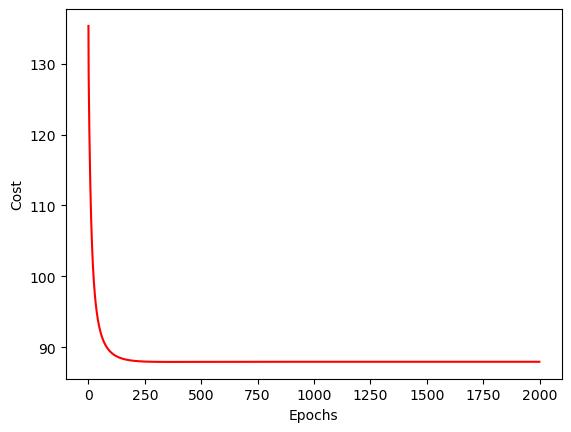

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(Cost,'r')

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

In [21]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(label_test, ypred)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

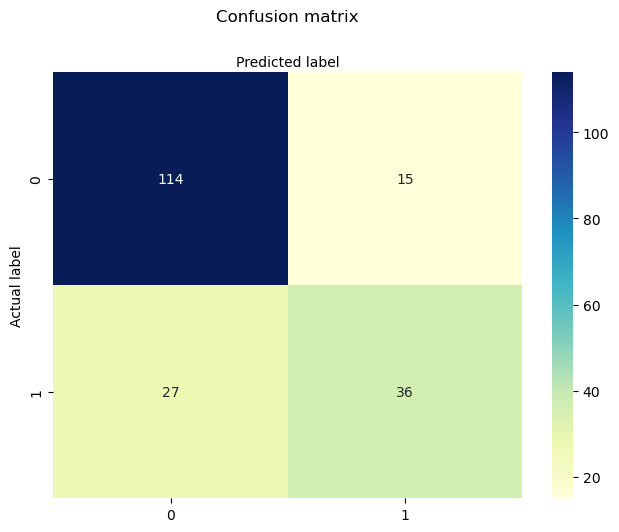

In [23]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print("Accuracy:",metrics.accuracy_score(label_test, ypred))
print("Precision:",metrics.precision_score(label_test, ypred))
print("Recall:",metrics.recall_score(label_test, ypred))

Accuracy: 0.78125
Precision: 0.7058823529411765
Recall: 0.5714285714285714
